In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline


In [3]:
fertility = (pd.read_csv("TOT_rate.csv"))
gdp = (pd.read_csv("GDP_forc.csv"))

In [4]:
gdp.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,GDPLTFORECAST,TOT,MLN_USD,A,1990,514523.527335
1,AUS,GDPLTFORECAST,TOT,MLN_USD,A,1991,507675.980286
2,AUS,GDPLTFORECAST,TOT,MLN_USD,A,1992,522807.944881
3,AUS,GDPLTFORECAST,TOT,MLN_USD,A,1993,544209.720036
4,AUS,GDPLTFORECAST,TOT,MLN_USD,A,1994,569998.059106


In [5]:
fertility.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,FERTILITY,TOT,CHD_WOMAN,A,1990,1.90,NaN
1,AUS,FERTILITY,TOT,CHD_WOMAN,A,1991,1.85,NaN
2,AUS,FERTILITY,TOT,CHD_WOMAN,A,1992,1.89,NaN
3,AUS,FERTILITY,TOT,CHD_WOMAN,A,1993,1.86,NaN
4,AUS,FERTILITY,TOT,CHD_WOMAN,A,1994,1.84,NaN


In [6]:
print(gdp)

     LOCATION      INDICATOR SUBJECT  MEASURE FREQUENCY  TIME         Value
0         AUS  GDPLTFORECAST     TOT  MLN_USD         A  1990  5.145235e+05
1         AUS  GDPLTFORECAST     TOT  MLN_USD         A  1991  5.076760e+05
2         AUS  GDPLTFORECAST     TOT  MLN_USD         A  1992  5.228079e+05
3         AUS  GDPLTFORECAST     TOT  MLN_USD         A  1993  5.442097e+05
4         AUS  GDPLTFORECAST     TOT  MLN_USD         A  1994  5.699981e+05
...       ...            ...     ...      ...       ...   ...           ...
2106     EA17  GDPLTFORECAST     TOT  MLN_USD         A  2026  1.615415e+07
2107     EA17  GDPLTFORECAST     TOT  MLN_USD         A  2027  1.633934e+07
2108     EA17  GDPLTFORECAST     TOT  MLN_USD         A  2028  1.652453e+07
2109     EA17  GDPLTFORECAST     TOT  MLN_USD         A  2029  1.670863e+07
2110     EA17  GDPLTFORECAST     TOT  MLN_USD         A  2030  1.689100e+07

[2111 rows x 7 columns]


In [7]:
idx_for_relevant_years = gdp.groupby('LOCATION')['TIME'].agg(['idxmin', 'idxmax'])

In [8]:
start_value = gdp.loc[idx_for_relevant_years['idxmin']]
end_value = gdp.loc[idx_for_relevant_years['idxmax']]
num_periods = len(gdp)
print(start_value)
print(end_value)
print(num_periods)

     LOCATION      INDICATOR SUBJECT  MEASURE FREQUENCY  TIME         Value
1694      ARG  GDPLTFORECAST     TOT  MLN_USD         A  1993  4.939541e+05
0         AUS  GDPLTFORECAST     TOT  MLN_USD         A  1990  5.145235e+05
41        AUT  GDPLTFORECAST     TOT  MLN_USD         A  1990  2.704879e+05
82        BEL  GDPLTFORECAST     TOT  MLN_USD         A  1990  3.306143e+05
1967      BGR  GDPLTFORECAST     TOT  MLN_USD         A  1995  8.617648e+04
1227      BRA  GDPLTFORECAST     TOT  MLN_USD         A  1990  1.534984e+06
123       CAN  GDPLTFORECAST     TOT  MLN_USD         A  1990  8.996442e+05
1063      CHE  GDPLTFORECAST     TOT  MLN_USD         A  1990  3.673287e+05
1268      CHL  GDPLTFORECAST     TOT  MLN_USD         A  1990  1.162625e+05
1309      CHN  GDPLTFORECAST     TOT  MLN_USD         A  1990  1.654607e+06
1732      COL  GDPLTFORECAST     TOT  MLN_USD         A  1990  2.593171e+05
1773      CRI  GDPLTFORECAST     TOT  MLN_USD         A  1991  2.923315e+04
164       CZ

In [9]:
merged_years = start_value.merge(end_value, on='LOCATION',suffixes=('_first', '_last'))
merged_years

,LOCATION,INDICATOR_first,SUBJECT_first,MEASURE_first,FREQUENCY_first,TIME_first,Value_first,INDICATOR_last,SUBJECT_last,MEASURE_last,FREQUENCY_last,TIME_last,Value_last
0,ARG,GDPLTFORECAST,TOT,MLN_USD,A,1993,4.939541e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,1.034128e+06
1,AUS,GDPLTFORECAST,TOT,MLN_USD,A,1990,5.145235e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,1.613475e+06
2,AUT,GDPLTFORECAST,TOT,MLN_USD,A,1990,2.704879e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,5.179247e+05
3,BEL,GDPLTFORECAST,TOT,MLN_USD,A,1990,3.306143e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,6.244135e+05
4,BGR,GDPLTFORECAST,TOT,MLN_USD,A,1995,8.617648e+04,GDPLTFORECAST,TOT,MLN_USD,A,2030,1.882111e+05
5,BRA,GDPLTFORECAST,TOT,MLN_USD,A,1990,1.534984e+06,GDPLTFORECAST,TOT,MLN_USD,A,2030,3.758912e+06
6,CAN,GDPLTFORECAST,TOT,MLN_USD,A,1990,8.996442e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,2.062052e+06
7,CHE,GDPLTFORECAST,TOT,MLN_USD,A,1990,3.673287e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,6.884358e+05
8,CHL,GDPLTFORECAST,TOT,MLN_USD,A,1990,1.162625e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,5.491613e+05
9,CHN,GDPLTFORECAST,TOT,MLN_USD,A,1990,1.654607e+06,GDPLTFORECAST,TOT,MLN_USD,A,2030,3.697671e+07


In [10]:
countries = merged_years.loc[merged_years['TIME_last'] == 2030].copy()

In [11]:
countries['TIME_diff'] = countries['TIME_last'] - countries['TIME_first']

In [25]:
import numpy as np
countries['cagr'] = np.power(countries['Value_last'] / countries['Value_first'],(1 / countries['TIME_diff'])) - 1
gdp_by_country = countries['cagr'] 
countries

,LOCATION,INDICATOR_first,SUBJECT_first,MEASURE_first,FREQUENCY_first,TIME_first,Value_first,INDICATOR_last,SUBJECT_last,MEASURE_last,FREQUENCY_last,TIME_last,Value_last,TIME_diff,cagr
0,ARG,GDPLTFORECAST,TOT,MLN_USD,A,1993,4.939541e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,1.034128e+06,37,0.020170
1,AUS,GDPLTFORECAST,TOT,MLN_USD,A,1990,5.145235e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,1.613475e+06,40,0.028985
2,AUT,GDPLTFORECAST,TOT,MLN_USD,A,1990,2.704879e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,5.179247e+05,40,0.016373
3,BEL,GDPLTFORECAST,TOT,MLN_USD,A,1990,3.306143e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,6.244135e+05,40,0.016024
4,BGR,GDPLTFORECAST,TOT,MLN_USD,A,1995,8.617648e+04,GDPLTFORECAST,TOT,MLN_USD,A,2030,1.882111e+05,35,0.022570
5,BRA,GDPLTFORECAST,TOT,MLN_USD,A,1990,1.534984e+06,GDPLTFORECAST,TOT,MLN_USD,A,2030,3.758912e+06,40,0.022643
6,CAN,GDPLTFORECAST,TOT,MLN_USD,A,1990,8.996442e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,2.062052e+06,40,0.020953
7,CHE,GDPLTFORECAST,TOT,MLN_USD,A,1990,3.673287e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,6.884358e+05,40,0.015828
8,CHL,GDPLTFORECAST,TOT,MLN_USD,A,1990,1.162625e+05,GDPLTFORECAST,TOT,MLN_USD,A,2030,5.491613e+05,40,0.039577
9,CHN,GDPLTFORECAST,TOT,MLN_USD,A,1990,1.654607e+06,GDPLTFORECAST,TOT,MLN_USD,A,2030,3.697671e+07,40,0.080764


In [13]:
'''
def calculate_cagr(row):
    if row['TIME_diff']==0:
        return np.nan
    if row['Value_first'] <=0 or row['Value_last'] <0:
        if row['Value_first'] < row['Value_last']:
            return 'I'
        elif row['Value_first'] > row['Value_last']:
            return 'D'
        else:
            return 0
    return np.power(row['Value_last']/row['Value_first'],(1/row['TIME_diff'])) -1
'''

    

"\ndef calculate_cagr(row):\n    if row['TIME_diff']==0:\n        return np.nan\n    if row['Value_first'] <=0 or row['Value_last'] <0:\n        if row['Value_first'] < row['Value_last']:\n            return 'I'\n        elif row['Value_first'] > row['Value_last']:\n            return 'D'\n        else:\n            return 0\n    return np.power(row['Value_last']/row['Value_first'],(1/row['TIME_diff'])) -1\n"

In [14]:
#countries['cagr_custom'] = countries.apply(calculate_cagr, axis=1)


In [15]:
idx = fertility.groupby('LOCATION')['TIME'].agg(['idxmin', 'idxmax'])

In [16]:
starts_value = gdp.loc[idx_for_relevant_years['idxmin']]
ends_value = gdp.loc[idx_for_relevant_years['idxmax']]

In [17]:
mergeds_years = starts_value.merge(ends_value, on='LOCATION',suffixes=('_first', '_last'))

In [18]:
fertrate = mergeds_years.loc[merged_years['TIME_last'] == 2030].copy()

In [19]:
fertrate['TIME_diff'] = fertrate['TIME_last'] - fertrate['TIME_first']

In [20]:
import numpy as np
fertility_by_country = fertility.groupby('LOCATION').agg({'Value': 'mean'})
print(fertility_by_country)

             Value
LOCATION          
ARG       2.512333
AUS       1.832333
AUT       1.434194
BEL       1.676000
BGR       1.424000
BRA       2.135000
CAN       1.584667
CHE       1.491935
CHL       2.027000
CHN       1.694000
COL       2.351000
CRI       2.258000
CYP       1.648667
CZE       1.445161
DEU       1.388333
DNK       1.759032
ESP       1.288667
EST       1.542903
EU        1.538276
FIN       1.728387
FRA       1.859032
GBR       1.770333
GRC       1.338000
HRV       1.482000
HUN       1.433333
IDN       2.555333
IND       3.014000
IRL       1.933333
ISL       2.025000
ISR       2.969000
ITA       1.313000
JPN       1.396000
KOR       1.321667
LTU       1.541667
LUX       1.591935
LVA       1.457333
MEX       2.612000
MLT       1.576000
NLD       1.666000
NOR       1.812581
NZL       1.978710
OAVG      1.729000
PER       2.819333
POL       1.437667
PRT       1.415667
ROU       1.477000
RUS       1.471333
SAU       3.708333
SVK       1.461667
SVN       1.403333
SWE       1.

In [34]:
full_data = (pd.read_csv("full_data.csv"))

In [35]:
full_data.head()

,Country,fertrate,cagr
0,ARG,2.512333,0.020170
1,AUS,1.832333,0.028985
2,AUT,1.434194,0.016373
3,BEL,1.676000,0.016024
4,BGR,1.424000,0.022570


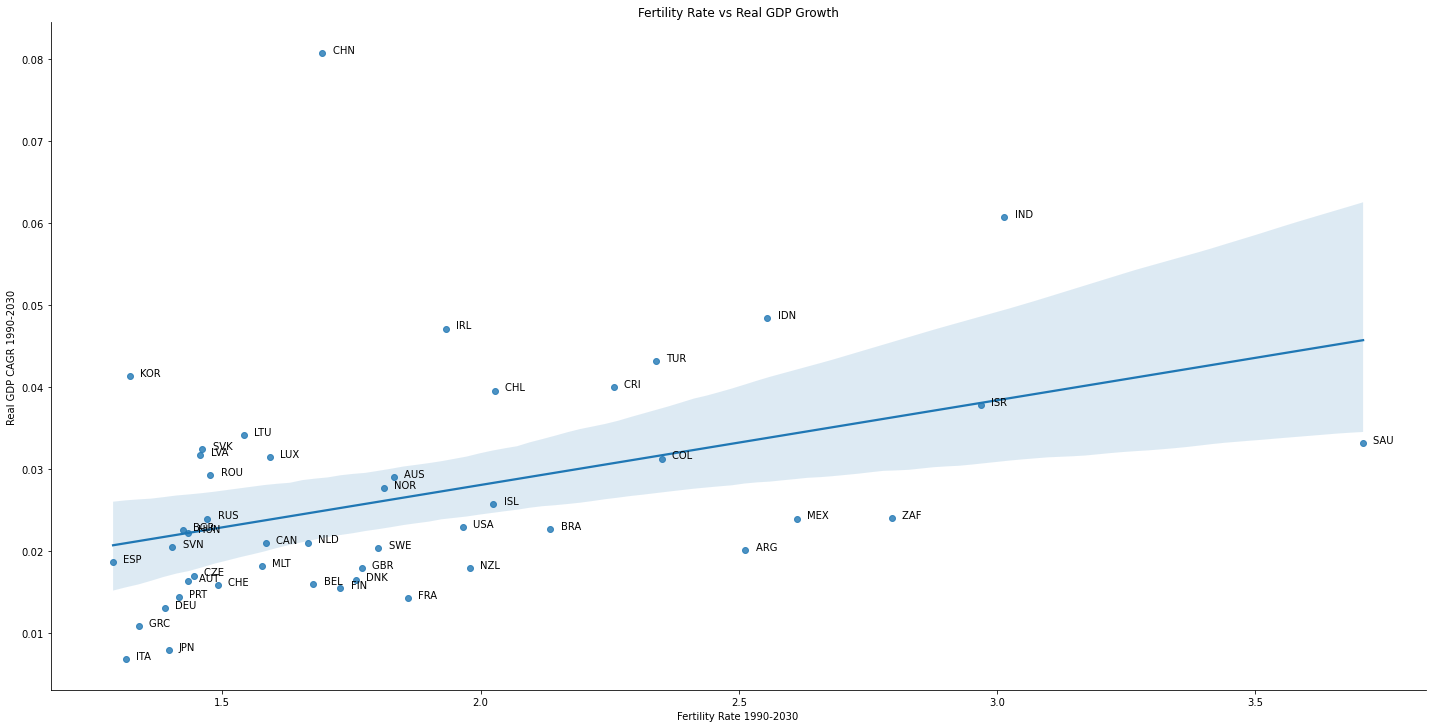

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


ax = sns.lmplot('fertrate', # Horizontal axis
           'cagr', # Vertical axis
           data=full_data, # Data source
           fit_reg=True, # Don't fix a regression line
           size = 10,
           aspect =2 ) # size and dimension

plt.title('Fertility Rate vs Real GDP Growth')
# Set x-axis label
plt.xlabel('Fertility Rate 1990-2030')
# Set y-axis label
plt.ylabel('Real GDP CAGR 1990-2030')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(full_data.fertrate, full_data.cagr, full_data.Country, plt.gca())  